# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
!unzip -o '/content/individual+household+electric+power+consumption.zip'

Archive:  /content/individual+household+electric+power+consumption.zip
  inflating: household_power_consumption.txt  


In [ ]:
#use this cell to import additional libraries or define helper functions

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [6]:
df_raw = pd.read_csv("/content/household_power_consumption.txt", delimiter = ";")

<ipython-input-6-00092f7cf6eb>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("/content/household_power_consumption.txt", delimiter = ";")


In [7]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [9]:
df_raw.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [27]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [28]:
#create your Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

<ipython-input-28-0efa43f4d5fc>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [29]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64
Datetime,datetime64[ns]


In [30]:
#convert all data columns to numeric types
df = df.drop(['Date', 'Time'], axis = 1)
numeric_cols = df.columns[df.columns != 'Datetime']  # Exclude 'Datetime' column
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [31]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [32]:
df.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Datetime,datetime64[ns]
Date,object
Time,object


It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [33]:
df.Date[0]

datetime.date(2006, 12, 16)

In [34]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [35]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

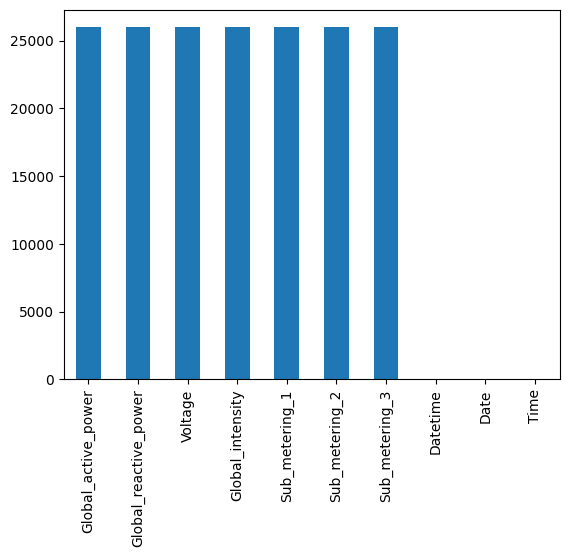

In [36]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

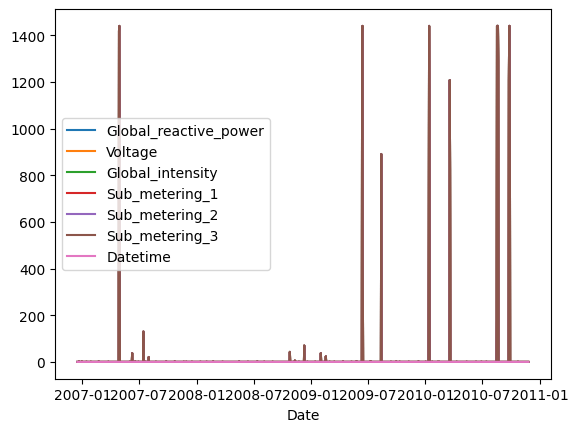

In [37]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

**Q: What do you notice about the pattern of missing data?**

A: The pattern of missing data appears to be relatively consistent across multiple columns over time, with some days exhibiting substantially more missing values than others.  The visualization using `df_na.plot` clearly shows this fluctuating pattern of missingness.  It's not random; there are periods with a higher concentration of missing data points.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: Given the visualizations of missing data, particularly the bar plot showing the number of missing values per feature and the time series plot illustrating missing data over time, imputation methods that account for the temporal aspect of the data would be most suitable.  Simple methods like mean/median imputation would not capture the trends present in the data.

Here's a breakdown of why and some potential approaches:

* **Why not mean/median imputation?**  The time series plot reveals non-random patterns of missing data.  Using a global mean or median would ignore the temporal dependencies, potentially distorting the underlying patterns and introducing bias.  If certain periods have systematically higher rates of missing data, using a single value will be inaccurate for those time periods.


* **Better Options:**

    * **Interpolation:** Linear interpolation (or more sophisticated methods like spline interpolation) would be a good starting point. Interpolation leverages the values before and after a missing point, creating a reasonable estimate based on the observed trend.  This would address the temporal dependencies more appropriately than simple imputation.

    * **Forward/Backward Fill:** If data points are only missing sporadically, a forward or backward fill could be effective.  This method uses the value from the preceding or following valid data point.

    * **Model-Based Imputation (e.g., KNN Imputation or Regression Imputation):**  More advanced methods like KNN imputation would consider the nearest neighbors in the feature space when imputing the missing values.  This allows for some non-linear relationships to be considered when making an imputation. Or, a regression model could be fitted to predict missing values based on other variables, leveraging the relationships between features.


* **Specific Recommendation:** I would start with **linear interpolation**.  It's relatively simple to implement, computationally inexpensive, and often provides reasonably accurate estimates for time series data with relatively smooth trends. If the interpolated data shows noticeable artifacts or inconsistencies with the overall pattern, I would then explore other methods like spline interpolation, k-NN imputation or model-based imputation.

* **Important Note:** Any method used should be evaluated for its potential impact on downstream analyses.  It is crucial to assess the impact of chosen imputation technique on the results of the modeling.


**TODO:Use your preferred method to remove or impute a value for the missing data**

<Axes: >

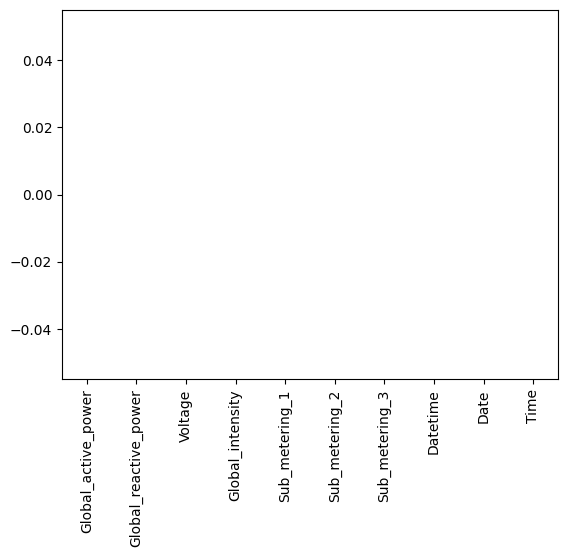

In [38]:
#clean up missing data here
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

df.isna().sum().plot.bar()

In [39]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3100,0.0480,239.0200,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6300,0.1020,240.9600,2.8000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5200,0.1920,242.8600,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0507,0.1120,3.2196,4.4165,6.1144,5.7855,8.3842,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A:

<Axes: xlabel='Datetime'>

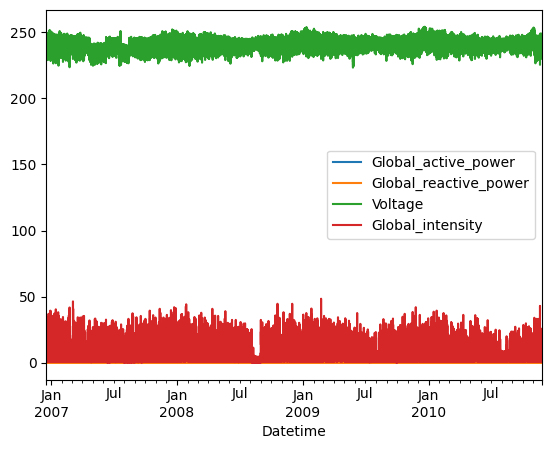

In [40]:
#build your line chart here
df.plot(x = 'Datetime', y = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'])

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:The visualization of the raw data (specifically the bar plot of missing values and the time series plot showing missing data over time) reveals a non-random pattern of missing data. This is not a useful visualization on its own, but crucial for understanding data quality.

The raw visualization shows a clear fluctuation in the amount of missing data across different time periods.  This pattern indicates that simply discarding the rows with missing data or using a global imputation technique (like a simple mean/median) would likely introduce bias or distort the true underlying trends.  

The raw visualization helps identify the need for more sophisticated imputation methods that consider the temporal nature of the missing data.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

In [44]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

# Group data by month and year, then calculate the mean for each group
monthly_averages = df.groupby([df['Datetime'].dt.year, df['Datetime'].dt.month])[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].mean()

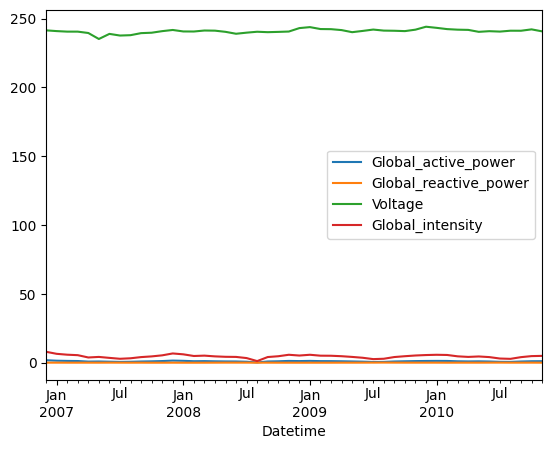

In [45]:
#build your linechart here
# Reset the index to make 'year' and 'month' regular columns, and avoid name collision
monthly_averages = monthly_averages.reset_index(names=['Year', 'Month'])

# Create a new datetime column representing the first day of each month
monthly_averages['Datetime'] = pd.to_datetime({'year': monthly_averages['Year'], 'month': monthly_averages['Month'], 'day': 1})

# Plot the monthly averages
monthly_averages.plot(x='Datetime', y=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'])
plt.show()

In [ ]:
# prompt: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data



**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: Examining the monthly averages reveals several patterns:

1. Seasonality:  Global_active_power shows a clear seasonal pattern, peaking in winter months (presumably due to heating) and dipping in summer.  This is expected for energy consumption data.  Global_intensity follows a similar, but less pronounced seasonal pattern.

2. Voltage Stability: The Voltage remains relatively stable throughout the year, with only minor fluctuations.  It doesn't exhibit strong seasonality.  This suggests that the power grid's voltage regulation is functioning well.

3. Reactive Power Trends: Global_reactive_power also shows some seasonality, but it's less pronounced than Global_active_power.  Its peaks and troughs don't perfectly align with the active power peaks and troughs.

4. Relationship between variables:
    * Global_active_power and Global_intensity tend to move together, which is intuitive.  Higher active power usually corresponds with higher current intensity.
    * There is less obvious correlation between Voltage and the other variables, although there might be some subtle interactions not immediately apparent from the monthly averages.  Further analysis with correlation coefficients or scatter plots could clarify this.

Further investigation, potentially using techniques like correlation analysis, autocorrelation, or time series decomposition, could reveal more intricate relationships and underlying trends within the data.  More advanced visualization techniques, such as heatmaps or scatter plots that color-code data points by month or time of year, could also be used to examine possible relationships more clearly.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [47]:
# Compute a 30-day moving average
df['Global_active_power_30d_avg'] = df['Global_active_power'].rolling(window=30*24, center=True).mean()
df['Global_reactive_power_30d_avg'] = df['Global_reactive_power'].rolling(window=30*24, center=True).mean()
df['Voltage_30d_avg'] = df['Voltage'].rolling(window=30*24, center=True).mean()
df['Global_intensity_30d_avg'] = df['Global_intensity'].rolling(window=30*24, center=True).mean()

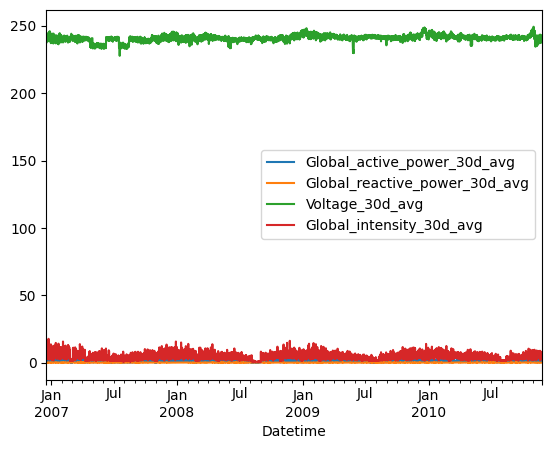

In [48]:
# Visualize the 30-day moving average
df.plot(x='Datetime', y=['Global_active_power_30d_avg', 'Global_reactive_power_30d_avg', 'Voltage_30d_avg', 'Global_intensity_30d_avg'])
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: The moving average and monthly average offer different perspectives on the time series data:

* **Monthly Average:** Provides a smoothed view of the overall trend across each month. It's excellent for identifying yearly seasonality and long-term patterns. However, it obscures shorter-term fluctuations and daily variations within a month.

* **30-Day Moving Average:**  Captures shorter-term trends and oscillations within the data. It smooths out daily noise, revealing the underlying trends more clearly than the raw data.  The moving average is sensitive to changes in the trend over time. The center=True parameter averages around the center of the 30 days, which is important for time-series data so that you do not lose data at the edges.


**Which is more effective?**

The effectiveness of each depends on the analytical goal:

* **For identifying long-term seasonality and yearly trends**: The **monthly average** is more suitable.  It provides a clear picture of the annual cycle.

* **For observing short-term trends, smoothing out noise, and detecting smaller fluctuations**: The **30-day moving average** is more effective.  It reveals subtle changes and patterns not visible in monthly data.

In this case, to understand the dynamics of the household power consumption over time, the **30-day moving average** likely provides a more insightful visualization.  It allows you to see both the seasonal changes and the shorter-term variations, giving a more complete view of the data.  Monthly data would show overall trends but would lack the granular insights available with a moving average. You could combine both plots to gain the most information.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

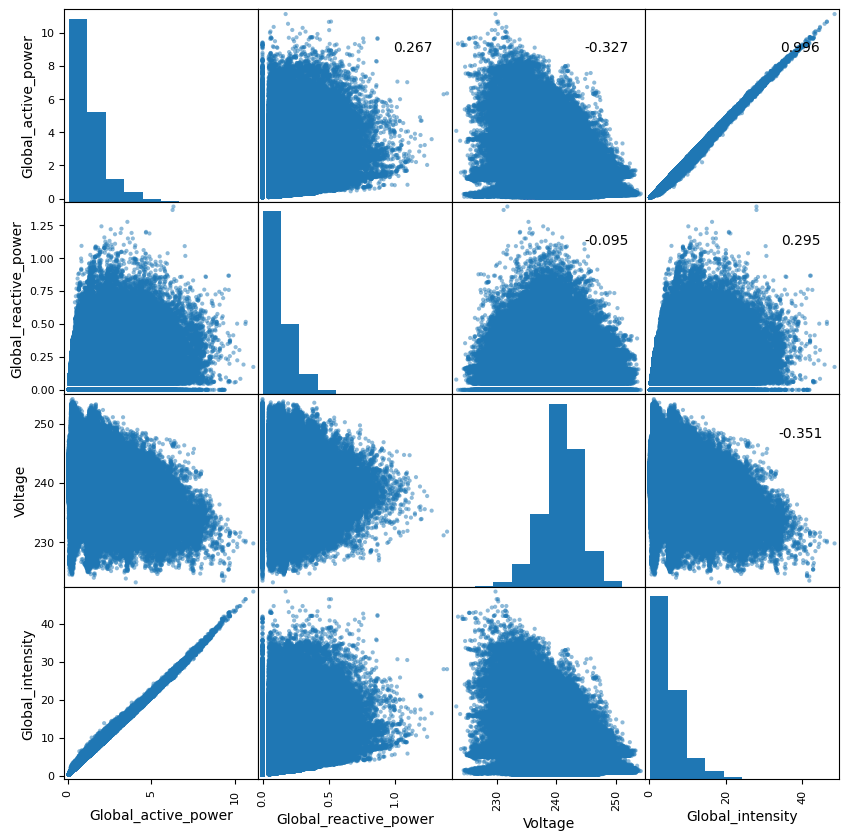

In [49]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: Based on the code and its output, here's a description of the observed patterns and correlations:

1. Missing Data Patterns:  The dataset exhibits non-random missing data.  There are periods with a higher concentration of missing values in several variables.  The visualization clearly shows this temporal pattern, suggesting the need for imputation methods that account for time-dependence, as opposed to simply replacing missing values with a global mean or median.  Failure to account for this could skew the analysis.

2. Seasonality in Energy Consumption: The 'Global_active_power' variable displays a strong seasonal pattern, peaking in winter and dipping in summer.  This is expected for energy consumption data, likely related to heating demands. 'Global_intensity' shows a similar, but weaker, seasonal pattern.  This seasonality is more clearly observed in monthly and 30-day moving averages.

3. Voltage Stability: The 'Voltage' variable remains relatively stable throughout the year, with minimal variations.  It does not exhibit strong seasonality, indicating efficient voltage regulation.

4. Relationship between Global_active_power and Global_intensity: These two variables show a strong positive correlation (as seen in the scatter matrix and correlation matrix).  This makes intuitive sense: higher active power consumption is usually accompanied by higher current intensity.

5. Other Correlations: The Spearman rank correlation matrix reveals more complex relationships between the variables. The relationships are nonlinear as per the description.

Effect on Downstream Tasks:

* Imputation of Missing Data: The non-random missing data necessitates careful imputation.  Methods like linear or spline interpolation, or model-based imputation (e.g., k-NN) are preferred to simple mean/median imputation because they preserve the temporal trends. The choice of imputation method affects downstream tasks significantly.

* Feature Engineering: The seasonal pattern in energy consumption indicates that time-based features (e.g., month, season) could improve model performance in predictive modeling tasks. Including month or day of week as a feature may help model this data appropriately.

* Model Selection:  Understanding the correlations between variables helps in choosing appropriate models.  The strong correlation between 'Global_active_power' and 'Global_intensity' implies that including both in a model might lead to multicollinearity.  Dimensionality reduction or regularization techniques might be necessary.  

* Time Series Analysis:  Due to the time series nature of the data, specialized time series models are suitable for forecasting or anomaly detection tasks.

* Visualization: The choice of visualization (raw data, moving averages, monthly averages) impacts the insights derived from the data. Different visualizations are suitable for revealing different temporal aspects of the data. Using the moving average would allow one to spot sudden changes or trends whereas the monthly average would simply highlight the yearly trends.

In summary, the observed patterns and correlations must be considered in all downstream tasks, especially imputation, feature engineering, model selection, and visualization.  Ignoring the non-random missing data or the strong correlations between variables could lead to inaccurate insights and misleading results.  